<a href="https://colab.research.google.com/github/hwanid/DevSet4/blob/master/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

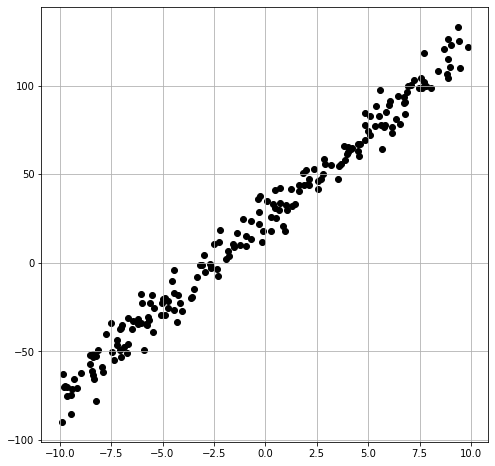

In [78]:
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c="black")
plt.grid()
plt.show()

In [0]:
n_samples = len(data)

In [0]:
X_b = np.c_[np.ones((n_samples,1)), x_data]
y = y_data.reshape(n_samples, 1)
learning_rate = 0.001
m = n_samples

theta = np.array([[-30],[-30]])

loss = []
theta0 = []
theta1 = []
for iter in range(100000):
  theta0.append(theta[0][0])
  theta1.append(theta[1][0])
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta_b = theta
  theta = theta - learning_rate*gradients
  
  loss_t = 2/m*((X_b.dot(theta) - y).T).dot((X_b.dot(theta) - y))
  loss.append(loss_t[0][0])
  if abs(theta - theta_b).sum() == 0:
    break

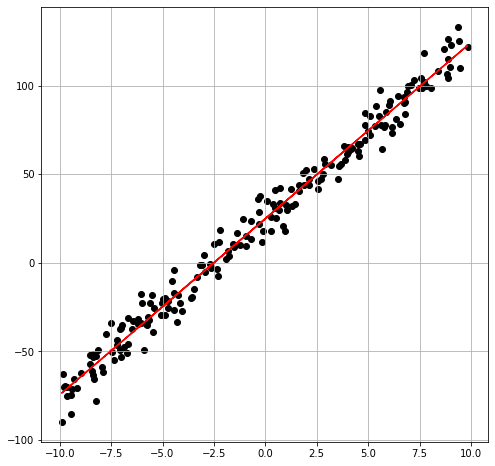

In [125]:
y_h = theta[0] + theta[1] * x_data
plt.figure(figsize=(8, 8))
plt.plot(x_data, y_h, c='r')
plt.grid()
plt.scatter(x_data, y_data, c='k')
plt.show()

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
xaxis = np.linspace(-30,30,601)
yaxis = np.linspace(-30,30,601)
theta0v, theta1v = np.meshgrid(xaxis, yaxis)
theta = np.stack((theta0v.reshape(-1), theta1v.reshape(-1)))

J = np.sum(((X_b.dot(theta) - y)**2), axis=0) / (2*m)
J = J.reshape((601,601))

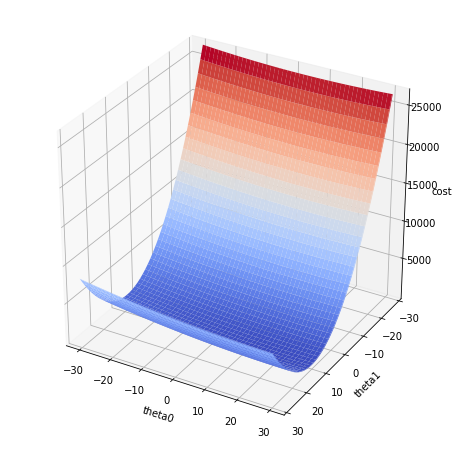

In [128]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(theta0v, theta1v, J, cmap='coolwarm')

ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("cost")
plt.ylim(30,-30)
plt.show()

In [0]:
theta0 = np.asarray(theta0)
theta1 = np.asarray(theta1)
theta_h = np.stack((theta0, theta1))

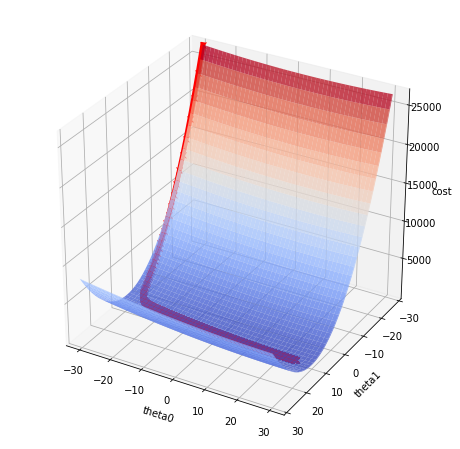

In [143]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(theta0v, theta1v, J, cmap='coolwarm', alpha=0.8)

J_h = np.sum(((X_b.dot(theta_h) - y)**2), axis=0) / (2*m)
ax.plot(theta0, theta1, J_h, marker="x", c='r', linewidth=5)

ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("cost")
plt.ylim(30,-30)
plt.show()